[View in Colaboratory](https://colab.research.google.com/github/sanattaori/python-DS/blob/master/support_vector_machine.ipynb)

# Support Vector Machine Classification

*   *Great for relatively small data sets with fewer outliers.*
*   *Used for both classification or regression problems.*



>>>> ![alt text](https://docs.opencv.org/2.4/_images/optimal-hyperplane.png)*italicized text*

### Hyper Plane ?

*   *A linear decision surface that splits space in two classes*
*   *Binary Classifier*
*   Points close to decision boundry is support vectors



### Building Support Vector Machine

In [0]:
# imports

#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

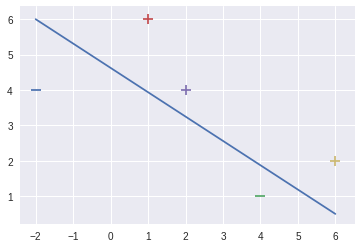

In [3]:
#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

#### Define our loss function

**The hinge loss**

![alt text](https://camo.githubusercontent.com/037d9b87e5f7049bf61268e7ab27caa3345d1972/687474703a2f2f692e696d6775722e636f6d2f4f7a43777a794e2e706e67)

![alt text](https://camo.githubusercontent.com/c971927c2a57b8dcd7e8dc6a1fee81eaa10b9a63/687474703a2f2f692e696d6775722e636f6d2f465a374a6347332e706e67)

**Objective Function**

![alt text](https://camo.githubusercontent.com/56e9ded32847a76adb327f31ca9580cd2d5b1d05/687474703a2f2f692e696d6775722e636f6d2f49354e4e7534342e706e67)

**minimize our loss/optimize for our objective (Gradient Descent)**

![alt text](https://camo.githubusercontent.com/03ab7412dff32425b1b2bec970a2da39c7e96a6e/687474703a2f2f692e696d6775722e636f6d2f36754b33426e482e706e67)

**Update rule for our weights (misclassified)**

![alt text](https://camo.githubusercontent.com/fbb72e96572184e6ea966da28431067694b7a20c/687474703a2f2f692e696d6775722e636f6d2f726b645070545a2e706e67)

**Update rule for our weights (correctly classified)**

![alt text](https://camo.githubusercontent.com/dc310263c6a79f590c7c3043ee077738479c9668/687474703a2f2f692e696d6775722e636f6d2f78544b62765a362e706e67)

In [0]:
# perform gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


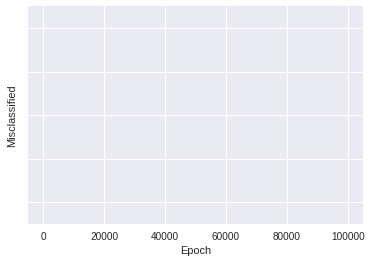

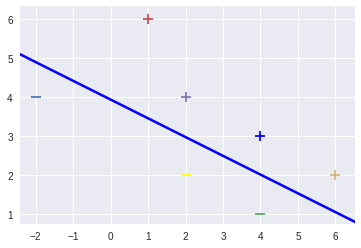

In [5]:
w = svm_sgd_plot(X,y)

for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')